# K-Nearest Neighbors (KNN) Implementation 
----
This code allows you to select a school district and locate its K nearest neighbors. 
 

## Importing packages, lists, and functions 

Importing Necessary Packages 

In [44]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi

Importing demographic buckets from other .py file (lists containing relevant columns to run algorithm on) 

In [45]:
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
from Demographic_Buckets import class_size_student_teacher_ratios
from Demographic_Buckets import student_mobility
from Demographic_Buckets import staff_demographics_experience
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economic_special_needs_percent
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import gender_distribution_percent
from Demographic_Buckets import grade_level_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_title1_percent
from Demographic_Buckets import district_identifiers

Importing functions from the .py file (containing all functions used for this analysis)

In [46]:
from KNN_Functions import calculate_missing_percentage
from KNN_Functions import find_nearest_districts
from KNN_Functions import plot_texas_districts
from KNN_Functions import plot_race_ethnicity_stacked_bar
from KNN_Functions import class_size_k6_cols
from KNN_Functions import plot_class_size_k6_bar

## Reading in Data & Cleaning

In [47]:
from KNN_Functions import plot_class_size_k6_bar


In [48]:
#Reading in the data
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
df = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.7Master_Files\Individual Year Files_Take2\merged_2023.csv")
distgrad = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distgrad_2023_clean.csv")
distprof = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
demographic_df = df[class_size_student_teacher_ratios + student_mobility + staff_demographics_experience + race_ethnicity_percent +
                    economic_special_needs_percent + language_education_percent + gender_distribution_percent + grade_level_percent +
                    special_populations_percent]

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace negative values with NaN only in numeric columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)


#plt.hist(calculate_missing_percentage(demographic_df) / 100)
#plt.title("Histogram of percentage of NA values in columns within demographic attributes")


Key takaways, the demographic data contains very few columns with a lot of NAs! The outcome oriented data on the other hand varies slightly. Regardless, the data science portion (fitting a knn model) will occur on mostly complete data

## Fitting model on Houston ISD to find 5 nearest neighbors for different distance metrics
---
Target District: Houston ISD (101912)  
Feature buckets used:   
* class_size_student_teacher_ratios  
* race_ethnicity_percent  
* staff_demographics_experience   


Number of Neighbors: 5   
Imputation Strategy: Median  


Distance Metric: euclidean
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
285         57905     DALLAS ISD
1093       227907      MANOR ISD
214         43918  COMMUNITY ISD
119         20902   ANGLETON ISD


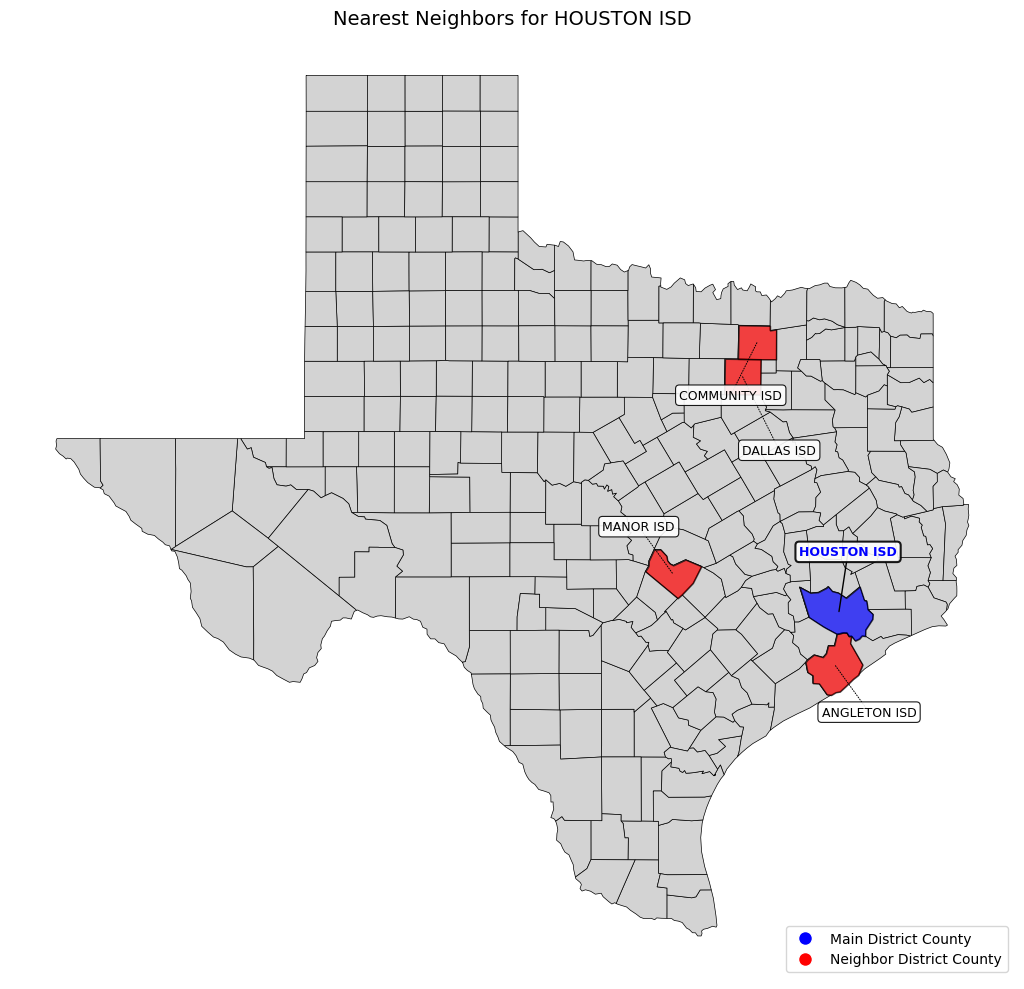

HOUSTON ISD


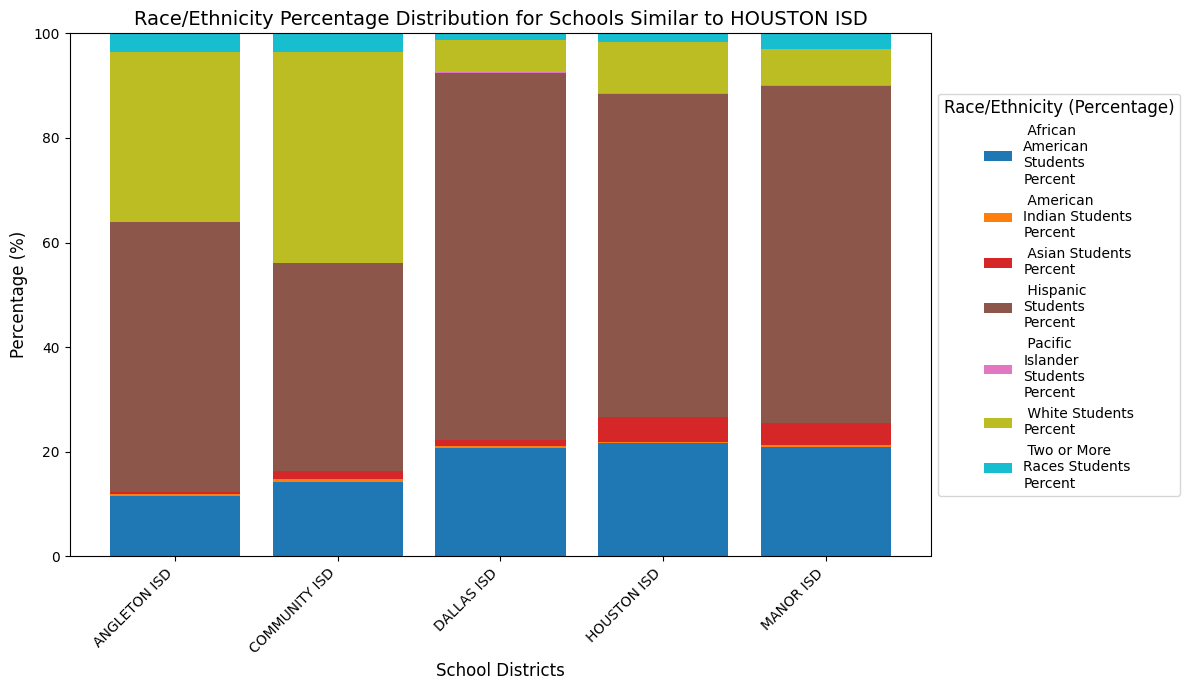

Input District: HOUSTON ISD


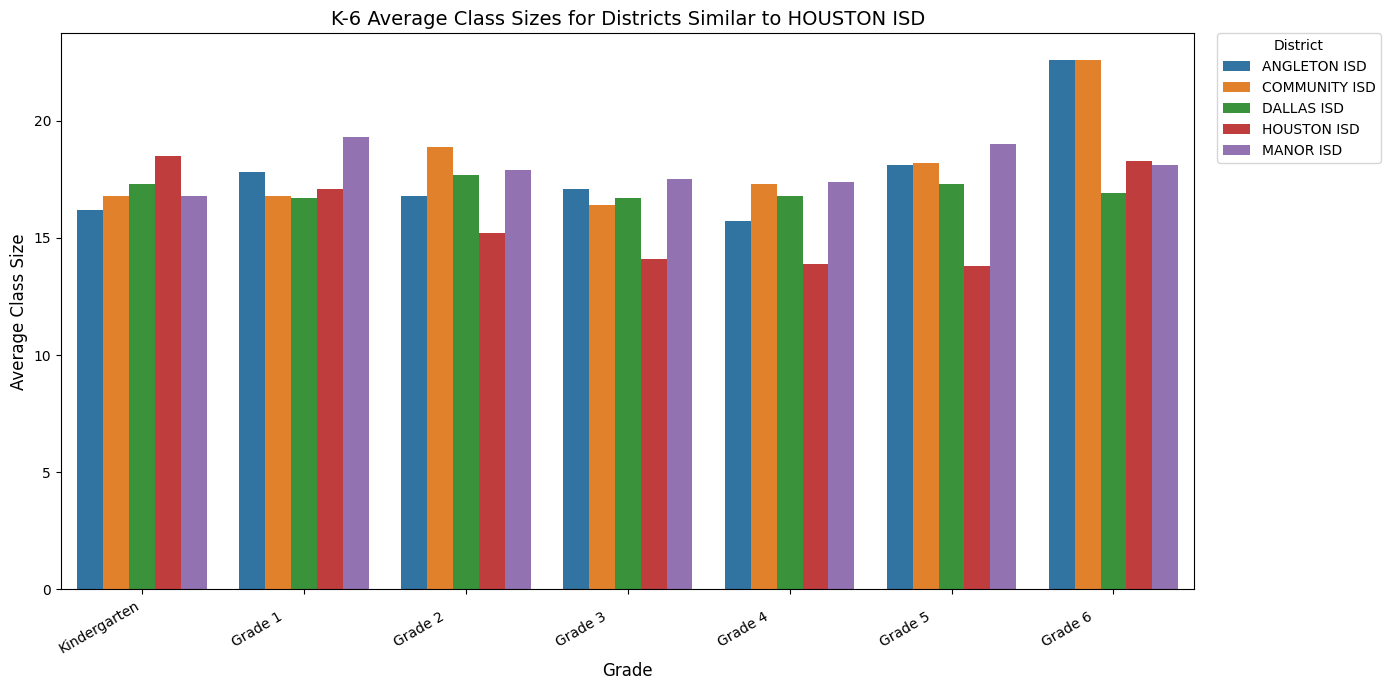

Distance Metric: manhattan
      DISTRICT_id                       DISTNAME
532        101912                    HOUSTON ISD
285         57905                     DALLAS ISD
283         57903  CARROLLTON-FARMERS BRANCH ISD
526        101905                CHANNELVIEW ISD
1091       227901                     AUSTIN ISD


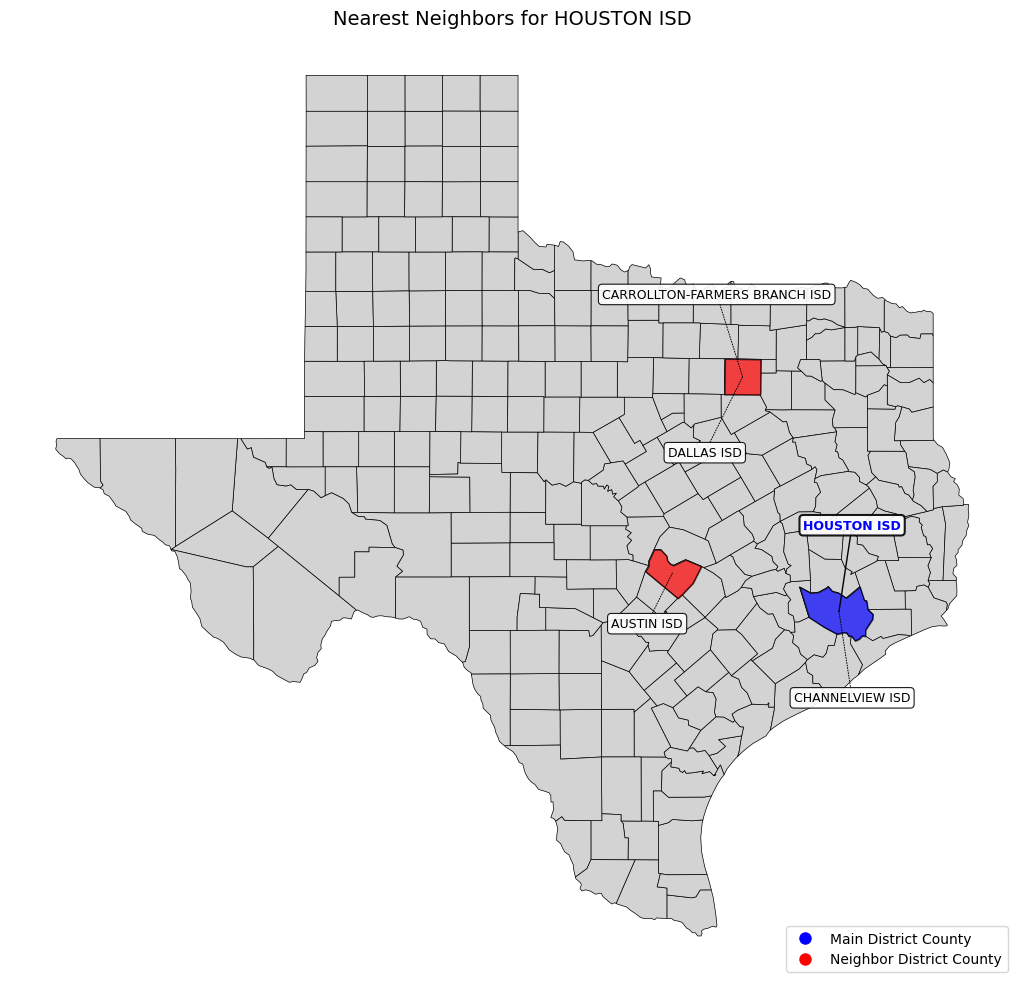

HOUSTON ISD


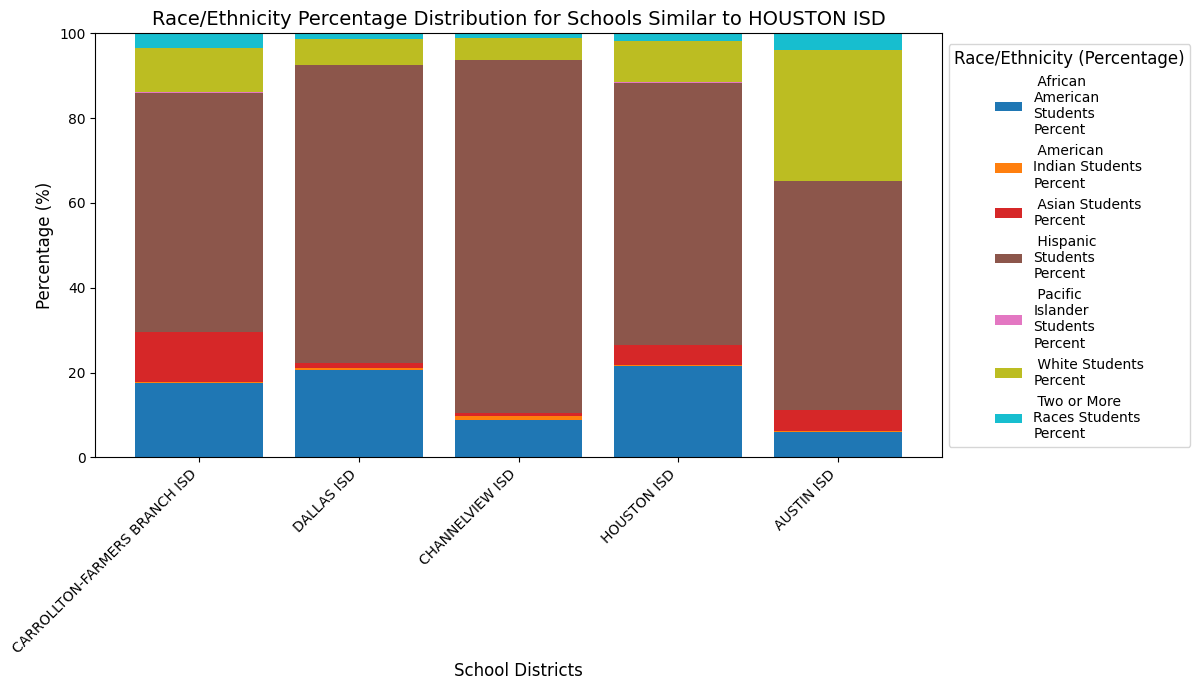

Input District: HOUSTON ISD


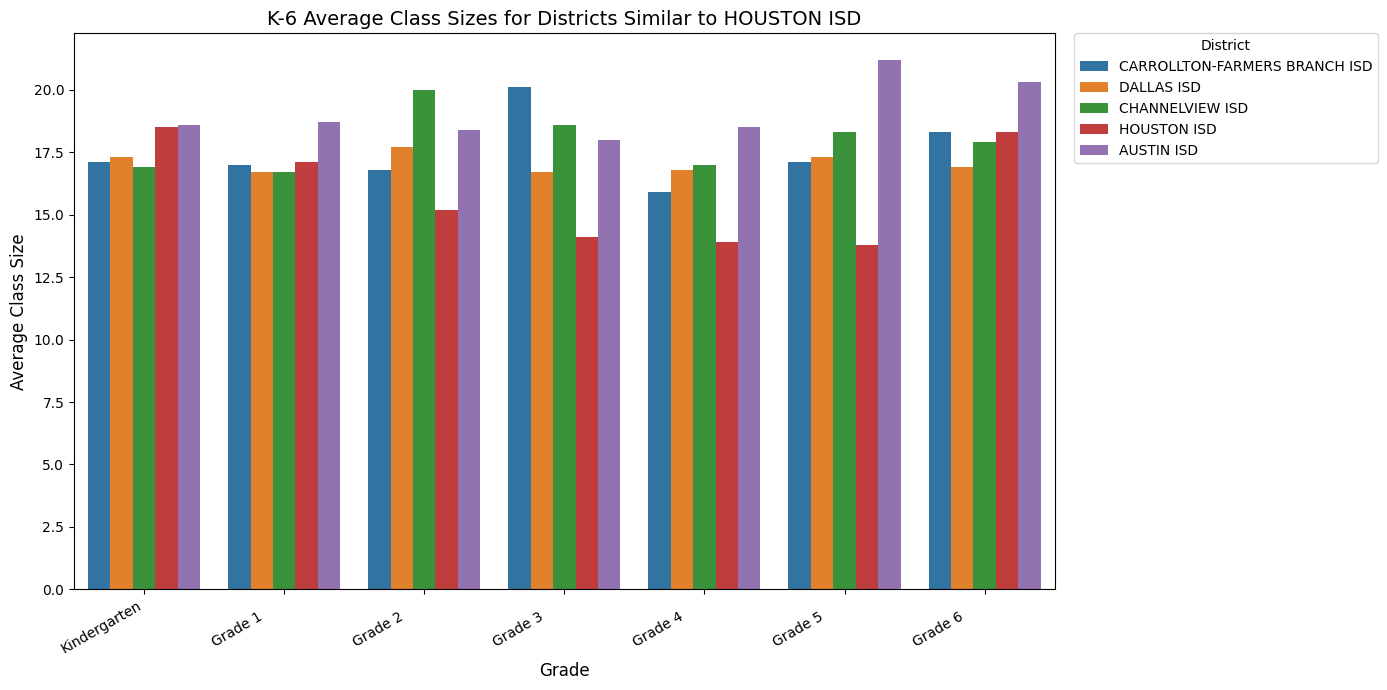

Distance Metric: mahalanobis
      DISTRICT_id          DISTNAME
532        101912       HOUSTON ISD
401         79901        LAMAR CISD
531        101911  GOOSE CREEK CISD
524        101902        ALDINE ISD
1091       227901        AUSTIN ISD


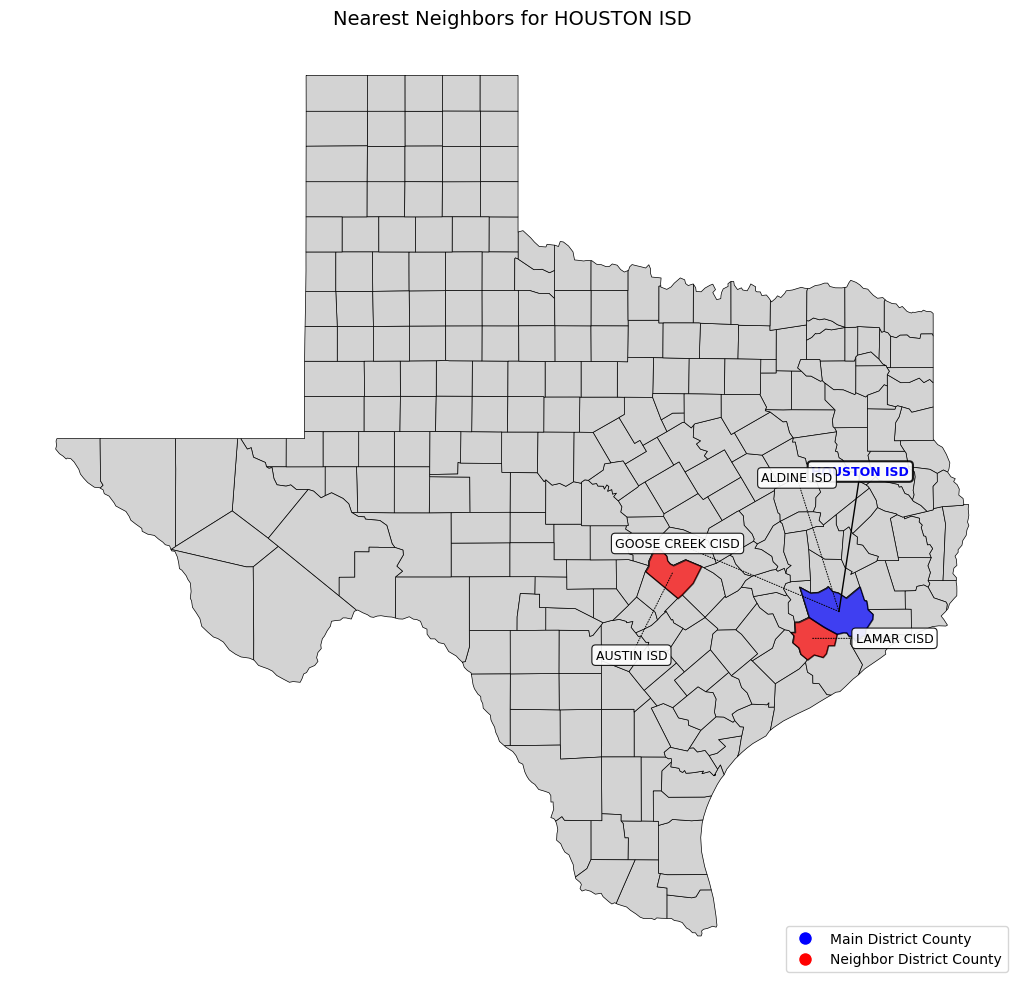

HOUSTON ISD


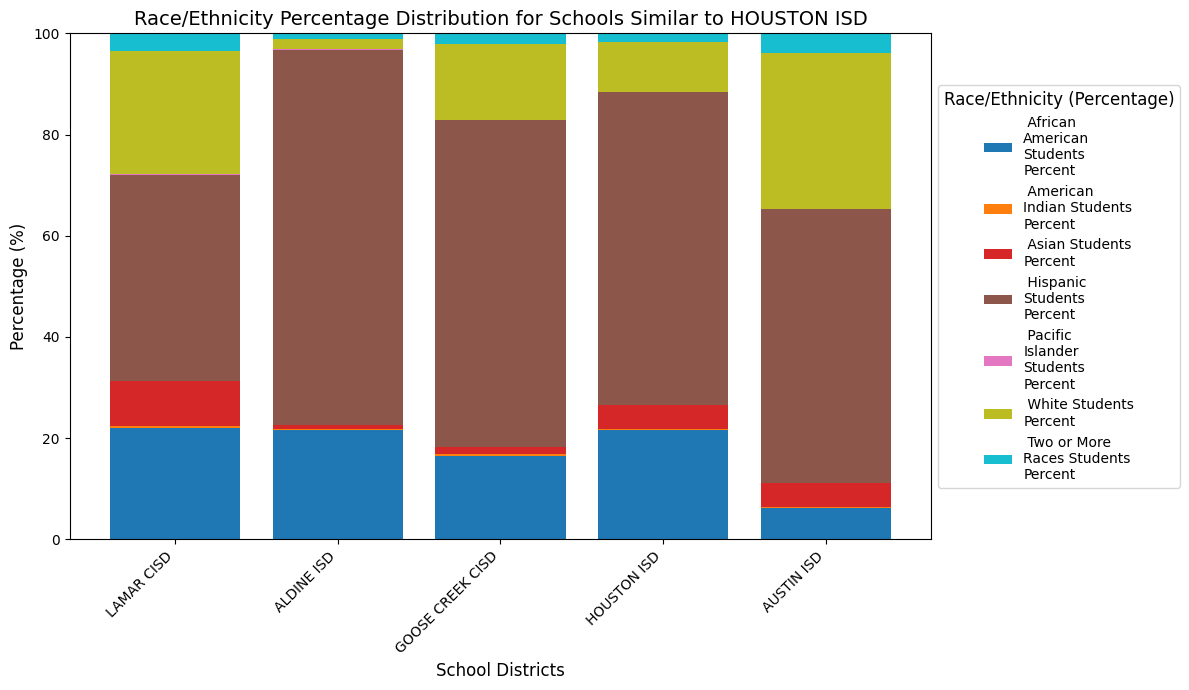

Input District: HOUSTON ISD


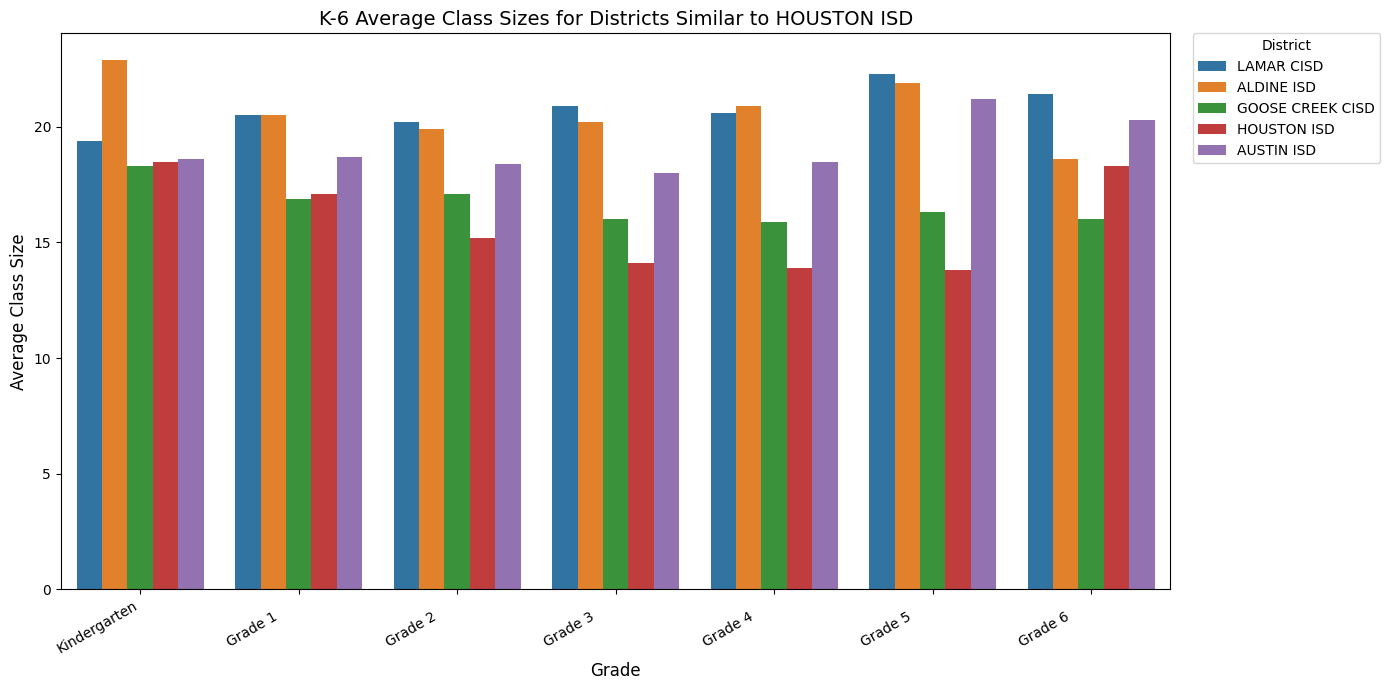

Distance Metric: cosine
      DISTRICT_id                       DISTNAME
532        101912                    HOUSTON ISD
285         57905                     DALLAS ISD
283         57903  CARROLLTON-FARMERS BRANCH ISD
1093       227907                      MANOR ISD
524        101902                     ALDINE ISD


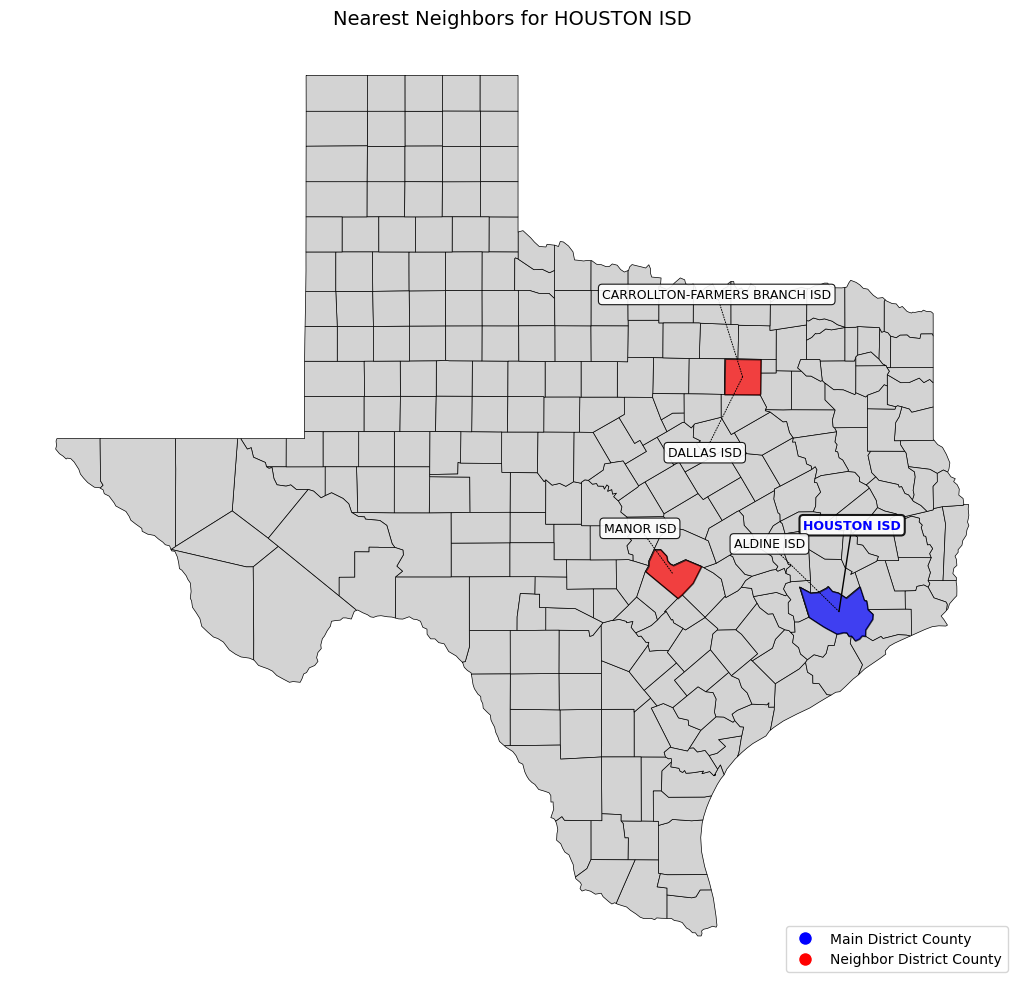

HOUSTON ISD


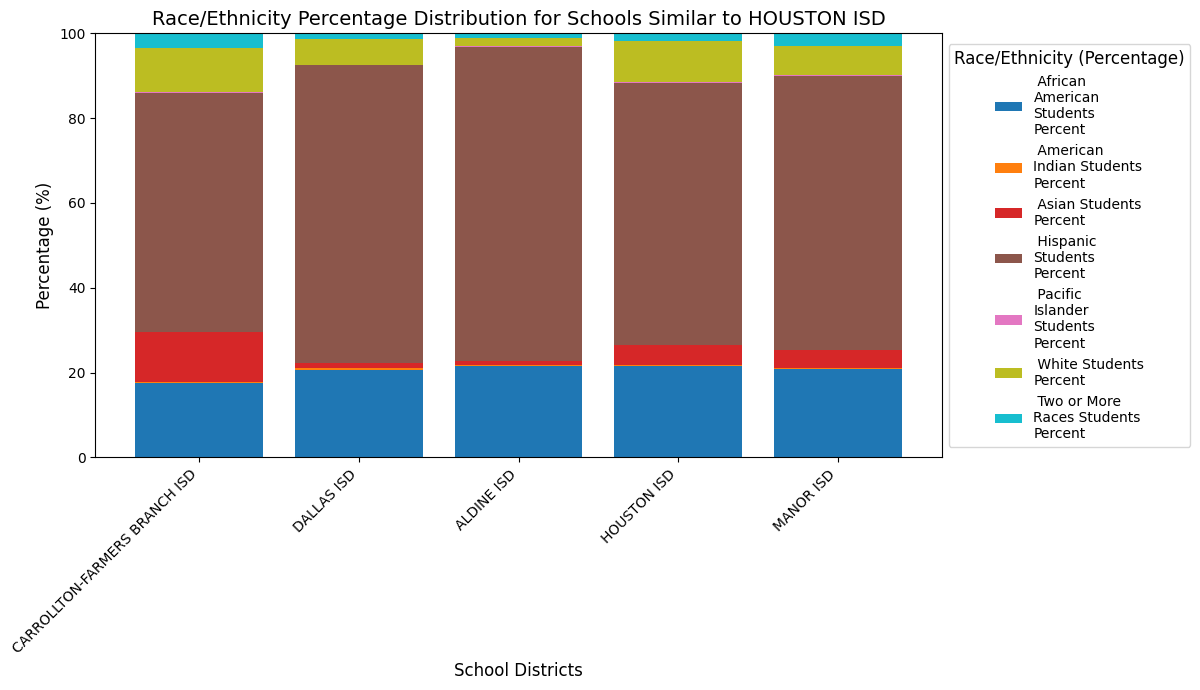

Input District: HOUSTON ISD


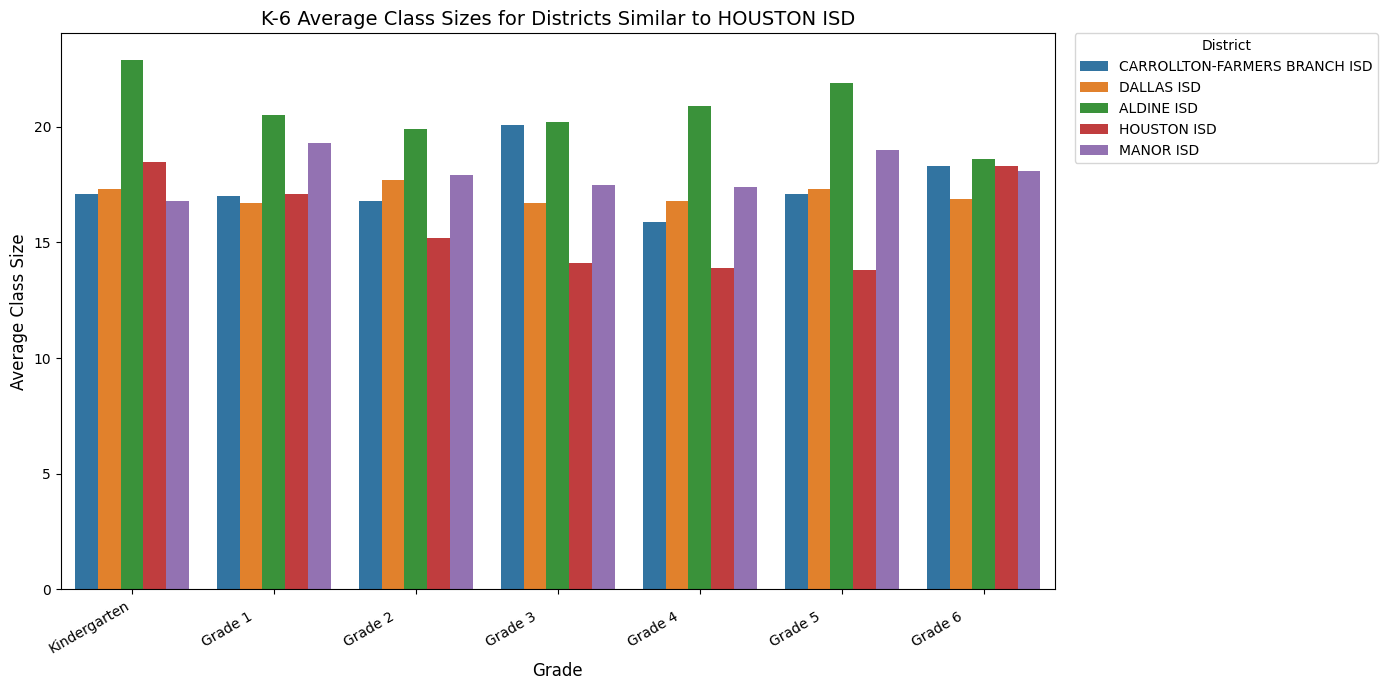

Distance Metric: canberra
      DISTRICT_id                       DISTNAME
532        101912                    HOUSTON ISD
283         57903  CARROLLTON-FARMERS BRANCH ISD
1093       227907                      MANOR ISD
285         57905                     DALLAS ISD
289         57910              GRAND PRAIRIE ISD


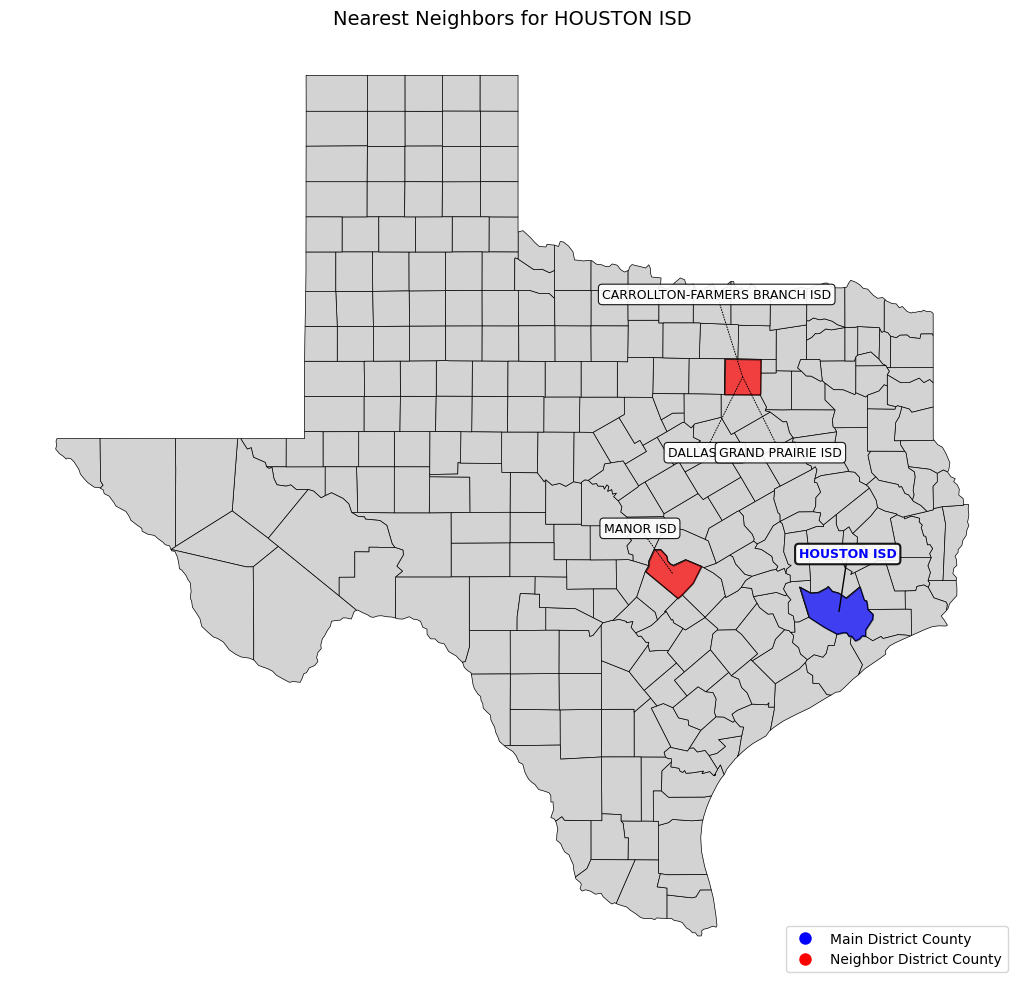

HOUSTON ISD


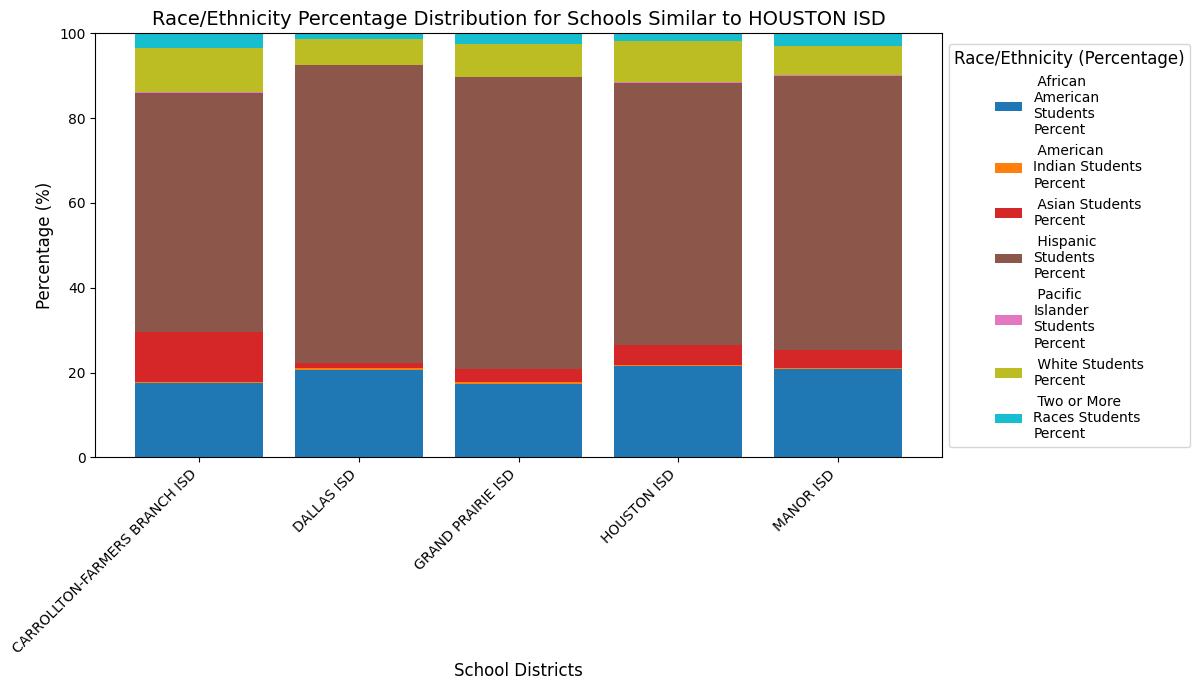

Input District: HOUSTON ISD


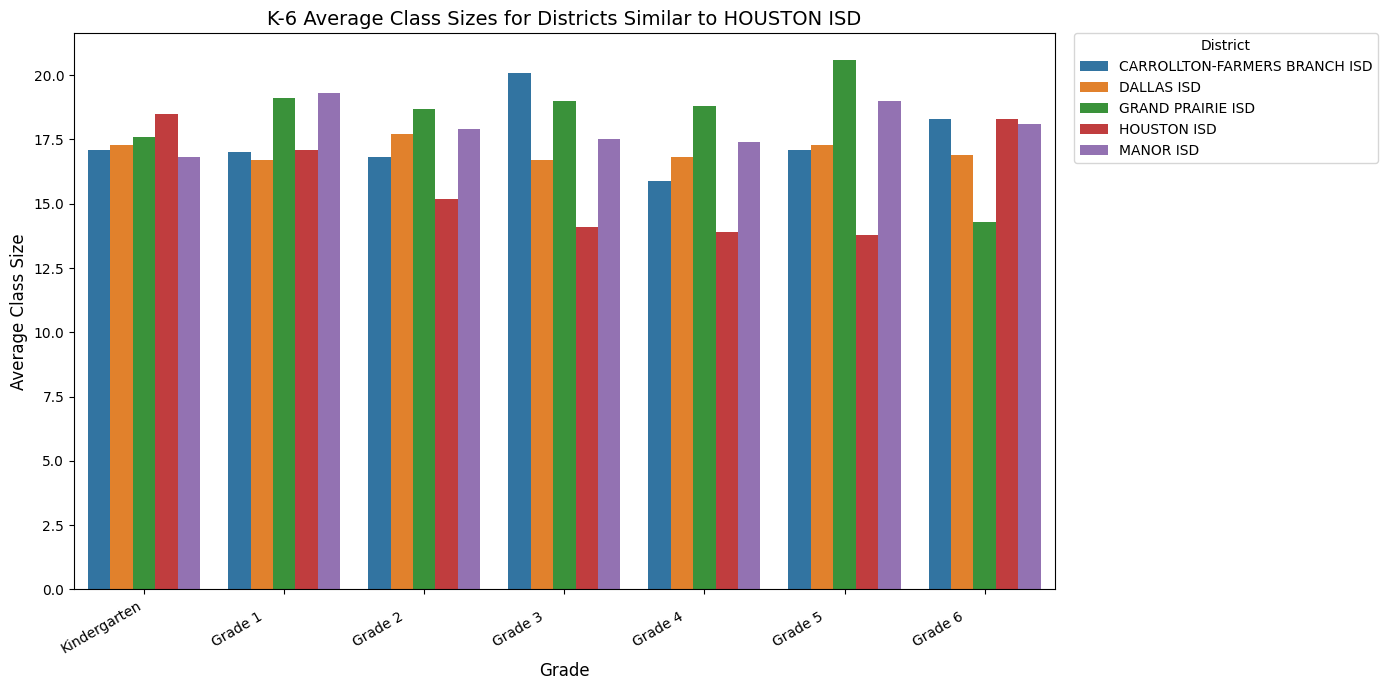

In [49]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent + class_size_student_teacher_ratios 

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
    print(knn_model)
    plot_texas_districts(knn_model, df)
    plot_race_ethnicity_stacked_bar(knn_model, df)
    plot_class_size_k6_bar(knn_model, df)
    
    

In [50]:
negative_columns = (df[race_ethnicity_percent + class_size_student_teacher_ratios] < 0).any()
#print(negative_columns[negative_columns == True])

negative_rows = df[df[race_ethnicity_percent + class_size_student_teacher_ratios].lt(0).any(axis=1)]


negative_rows[list(negative_columns[negative_columns == True].index)]

""
